# Linear SVC Assignment

In [34]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib as plt

### Import the admissions data set (admissions.csv).

In [3]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [15]:
data.SchoolRank.nunique()

5

In [20]:
y_rank = pd.get_dummies(data['SchoolRank'], prefix_sep='rank_of_school', drop_first=True)

### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [4]:
X = data.drop(['Admitted'], axis=1)
y = data.Admitted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [8]:
svm = SVC(C=10, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
svm.score(X_train, y_train)

0.8857142857142857

In [10]:
pred = svm.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        43
           1       0.87      0.90      0.88        77

    accuracy                           0.85       120
   macro avg       0.84      0.83      0.84       120
weighted avg       0.85      0.85      0.85       120



### Choose some other values for C and show the difference between the scores for the train and test sets.

In [11]:
svm = SVC(C=0.1, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
svm.score(X_train, y_train)

0.8857142857142857

In [13]:
pred = svm.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        43
           1       0.85      0.86      0.85        77

    accuracy                           0.81       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.81      0.81      0.81       120



### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [26]:
X = data.drop(['SchoolRank'], axis=1)
y = data.SchoolRank

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [29]:
svm = SVC(C=0.1, kernel='linear')
svm.fit(X_train, y_train)

svm.score(X_train, y_train)

0.6071428571428571

### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

In [28]:
pred = svm.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.43      0.43      0.43         7
           2       0.59      0.70      0.64        33
           3       0.71      0.69      0.70        42
           4       0.42      0.22      0.29        23
           5       0.43      0.60      0.50        15

    accuracy                           0.57       120
   macro avg       0.51      0.53      0.51       120
weighted avg       0.57      0.57      0.56       120



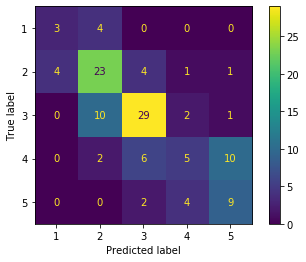

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test)